In [1]:
from polytrope_model import *
from scipy.stats import norm


In [2]:
def monte_carlo(M, dM, R, dR, L, dL, Z_X, dZ_X, Y, dY, r_n, d_c, tau, tau_t, N, L_sol,a,b):
    nn = np.zeros(N)
    Mm = M + dM*np.random.normal(0, 1, N)
    Rr = R + dR*np.random.normal(0, 1, N)
    Ll = L + dL*np.random.normal(0, 1, N)
    Z_Xx = Z_X + dZ_X*np.random.normal(0, 1, N)
    Yy = Y + dY*np.random.normal(0, 1, N)
    for i in range(N):
        print(f"Iteration {i + 1}/{N}")
        try:
            # Attempt to calculate the polytropic index with the current parameters
            nn[i] = index(y, a, b, Mm[i], Ll[i], Yy[i], Z_Xx[i], Rr[i], r_n, d_c, tau, tau_t, L_sol)
        except ValueError as e:
            # If there's a ValueError, skip this iteration and print a message
            print(f"Warning: Skipping iteration {i + 1} due to error: {e}")
            #nn[i] = np.nan  # Optionally, set this entry to NaN or some other marker
    return nn

In [3]:
#Sol
M_sol = 1.988475e33
L_sol = 3.828e33
R_sol = 6.957e10
Z_sol = 0.02857
Y_sol = 0.28

#%%
# Epsilon Eridani
M_e = 0.82 * M_sol
dM_e = 0.02 * M_sol
R_e = 0.738 * R_sol
dR_e= 0.0003 * R_sol
L_e = 0.32 * L_sol
dL_e = 0.01 * L_sol
metal_e = -0.08
dmetal_e = 0.01
Z_e = Z_sol*10**metal_e
Y_e = 0.2423
dY_e = 0.0054
total_time_e = 2*4.6*M_e*(1/L_e)


# Theta Persei
M_t = 1.138 * M_sol
dM_t = 0.010 * M_sol
R_t = 1.319 * R_sol
dR_t = 0.011 * R_sol
L_t = 2.235 * L_sol
dL_t = 0.040 * L_sol
metal_t = -0.03
dmetal_t = 0.09
Z_t = Z_e = Z_sol*10**metal_t
Y_t = 0.2423
dY_t = 0.0054
total_time_t = 2*4.6*M_e*(1/L_t)

#### <b> Epsilon Eridani </b>

/Users/rodrigocastro/Desktop/Computational_Astronomy/polytrope_model.py:37: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  sol = odeint(lane_emden_sys, lane_em_0, xi_range, args=(n,), tfirst=True)


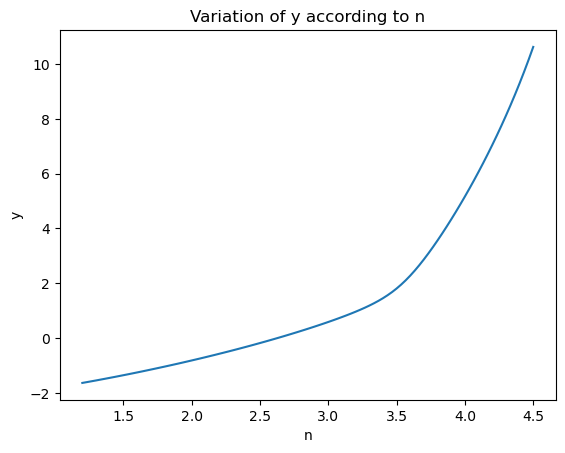

In [4]:
valores_e = np.linspace(1.2, 4.5, 100)
Xs = (1-Y_e)/(1+Z_e)
Z = 1-Y_e-Xs
yy_e = [y(i, Xs, 0.2, 0.03, R_e, total_time_e/2, total_time_e, M_e, Z, L_sol, L_e) for i in valores_e]
plt.xlabel('n')
plt.ylabel('y')
plt.title('Variation of y according to n')
plt.plot(valores_e, yy_e)

In [5]:
poly_index = index(y, 1.2, 4.5, M_e, L_e, Y_e, Z_e, R_e, L_sol, 0.2, 0.03, total_time_e/2, total_time_e)
poly_index

2.625441700539841

In [ ]:
Xs = (1-Y_sol)/(1+Z_sol)
Z = 1-Y_sol-Xs
xi, y1, y2 = lane_emden_solver(poly_index)
X = chemical_composition(xi, Xs, 0.2, 0.03, total_time_e/2, total_time_e)
nn_e = monte_carlo(M_e, dM_e, R_e, dR_e, L_e, dL_e,  Z_e, dmetal_e, Y_e, dY_e, 0.2, 0.03, total_time_e/2, total_time_e, 3000, L_sol, a=2, b= 3)


Iteration 1/1000
Iteration 2/1000
Iteration 3/1000
Iteration 4/1000
Iteration 5/1000
Iteration 6/1000
Iteration 7/1000
Iteration 8/1000
Iteration 9/1000
Iteration 10/1000
Iteration 11/1000
Iteration 12/1000
Iteration 13/1000


KeyboardInterrupt: 

In [ ]:
std_e = np.std(nn_e)
mean_e = np.mean(nn_e)

In [ ]:
def plot_histogram(nn, bins):
    plt.hist(nn, bins=bins, color='blue', edgecolor='black', density=True)
    plt.xlabel('n')
    plt.ylabel('N(n)')
    plt.title('Monte Carlo Simulation Results for Index')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

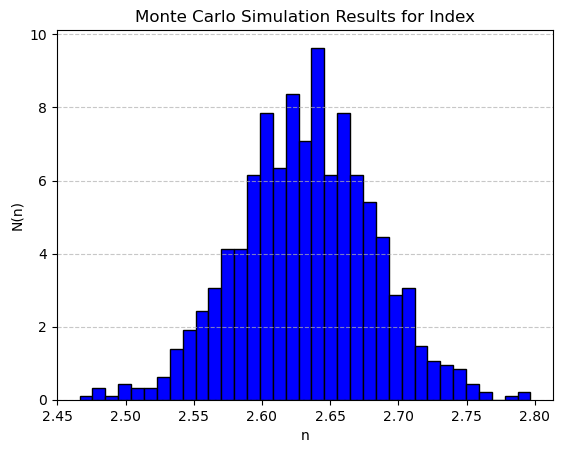

In [ ]:
plot_histogram(nn_e, 40)

In [ ]:
# Gaussian
# Generate x values for the curve
x_gauss = np.linspace(mean_e - 5*std_e, mean_e + 5*std_e, 3000)

# Calculate the PDF of the normal distribution
y_gauss= norm.pdf(x_gauss, mean_e, std_e)

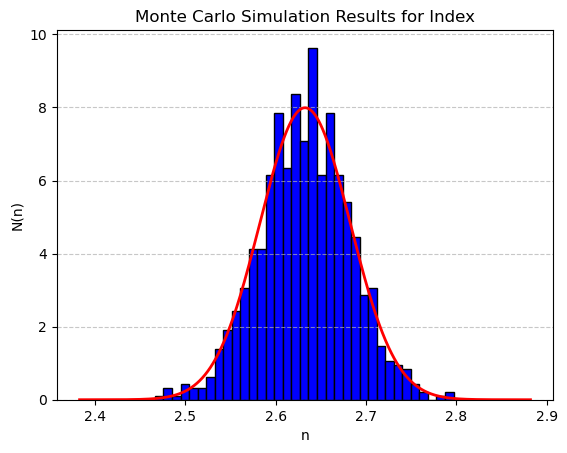

In [ ]:
# Mean vertical line
plt.axvline(x=mean_e, color='red', linewidth=2, label='Mean')

# Gaussian
plt.plot(x_gauss, y_gauss, color='orange', linewidth=2, label='Gaussian')

# Histogram
plt.hist(nn_e, 40, color='blue', edgecolor='black', density=True)

plt.xlabel('n')
plt.ylabel('N(n)')
plt.title('Monte Carlo Simulation Results for Index')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()